# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [3]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [4]:
data = pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
data = pd.read_csv('weight-height.csv')
male_df = data.loc[data['Gender'] == 'Male']
female_df =  data.loc[data['Gender'] == 'Female']

print("Male Height mean:", male_df[['Height']].mean())
print("Male Height sd:", male_df[['Height']].std())
print("Male Weight mean:", male_df[['Weight']].mean())
print("Male weight sd:", male_df[['Weight']].std())
print("Female Height mean:", female_df[['Height']].mean())
print("Female Height sd:", female_df[['Height']].std())
print("Female Weight mean:", female_df[['Weight']].mean())
print("Female Weight sd:", female_df[['Weight']].std())

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: Height    69.026346
dtype: float64
Male Height sd: Height    2.863362
dtype: float64
Male Weight mean: Weight    187.020621
dtype: float64
Male weight sd: Weight    19.781155
dtype: float64
Female Height mean: Height    63.708774
dtype: float64
Female Height sd: Height    2.696284
dtype: float64
Female Weight mean: Weight    135.860093
dtype: float64
Female Weight sd: Weight    19.022468
dtype: float64


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

/opt/conda/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)
/opt/conda/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


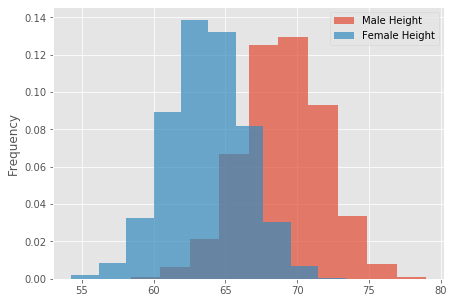

In [15]:
plt.figure(figsize=(7, 5))
male_df.Height.plot.hist(bins=10, normed=True, label = 'Male Height', alpha = 0.7 )
female_df.Height.plot.hist(bins=10, normed=True, label = 'Female Height', alpha = 0.7 )
plt.legend()


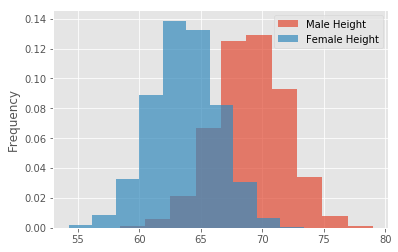

In [17]:
# Your code here

In [18]:
# Record your observations - are these inline with your personal observations?


## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

In [16]:
import numpy as np
n, bins = np.histogram(x, 10, density=1)
n , bins

NameError: name 'x' is not defined

In [30]:
def density(x):
    n, bins = np.histogram(data.Height, 20, density=1)
    
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    for k in range (n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]

    return pdfx,pdfy

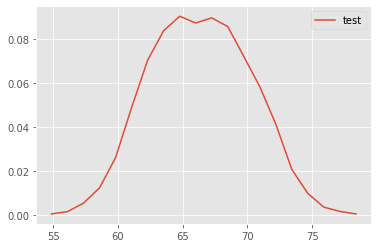

In [33]:
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

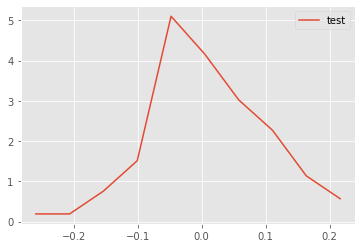

In [37]:
def density(x):
    
    n, bins = np.histogram(x, 10, density=1)
    # Initialize numpy arrays with zeros to store interpolated values
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    # Interpolate through histogram bins 
    # identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]

    # plot the calculated curve
    return pdfx, pdfy


# Generate test data and test the function
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()
plt.show()

## Add overlapping density plots to the histograms plotted earlier

In [26]:
#Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

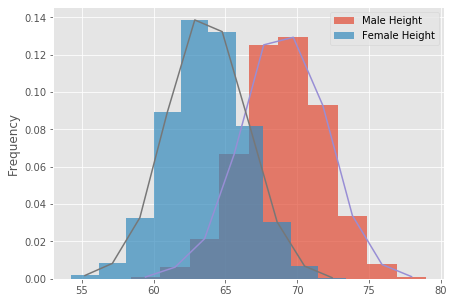

In [38]:
plt.figure(figsize=(7, 5))
male_df.Height.plot.hist(bins=10, density=True, label = 'Male Height', alpha = 0.7 )
female_df.Height.plot.hist(bins=10, density=True, label = 'Female Height', alpha = 0.7 )
plt.legend()

x,y = density(male_df.Height)
plt.plot(x,y)
x,y = density(female_df.Height)
plt.plot(x,y)
plt.show()

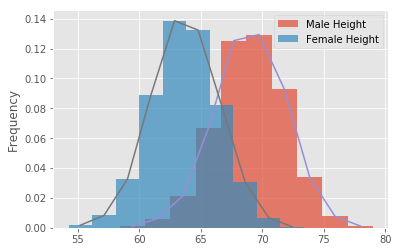

In [20]:
# Your code here 

## Repeat the above exercise for male and female weights

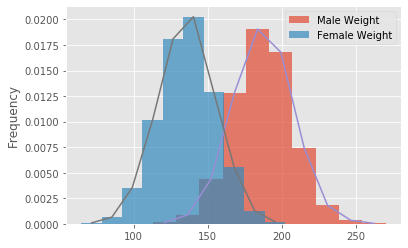

In [40]:
# Your coplt.figure(figsize=(7, 5))
male_df.Weight.plot.hist(bins=10, density=True, label = 'Male Weight', alpha = 0.7 )
female_df.Weight.plot.hist(bins=10, density=True, label = 'Female Weight', alpha = 0.7 )
plt.legend()

x,y = density(male_df.Weight)
plt.plot(x,y)
x,y = density(female_df.Weight)
plt.plot(x,y)
plt.show()

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?

## Repeat the above experiments in seaborn and compare with your results

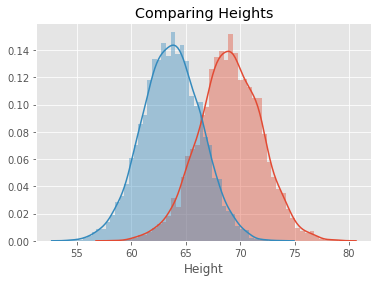

In [23]:
# Code for heights here

In [43]:
import seaborn as sns

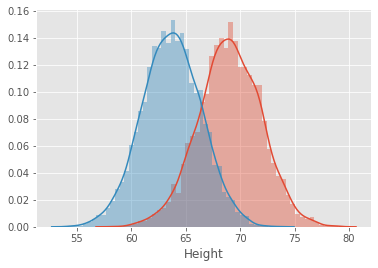

In [56]:
import scipy.stats as stats
# Create two vertical subplots sharinag 15% and 85% of plot space
# sharex allows sharing of axes i.e. building multiple plots on same axes

sns.distplot(male_df.Height, 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "alpha": 0.4, 
                                  "label": "Histogram",
                                  })

sns.distplot(female_df.Height, 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "alpha": 0.4, 
                                  "label": "Histogram",
                                  })

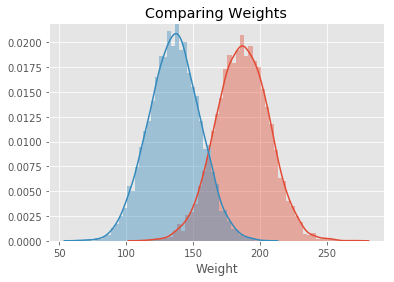

In [24]:
# Code for weights here

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.